In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from datetime import datetime
%matplotlib inline
df = pd.read_csv ('AirPassengers.csv')
df.head

<bound method NDFrame.head of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [22]:
rcParams['figure.figsize']= 10,6

In [2]:
df = pd.DataFrame(df)

In [3]:
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
df['Month']= pd.to_datetime(df['Month'], infer_datetime_format=True)
idf = df.set_index(['Month'])
from datetime import datetime
idf['1949']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


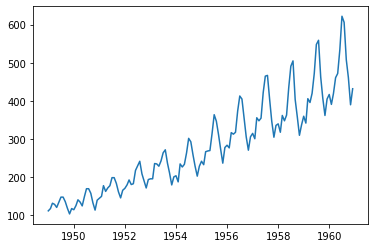

In [13]:
plt.plot(idf)

Text(0, 0.5, 'No of passengers')

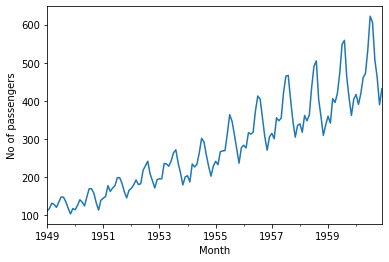

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y - %m')
data = pd.read_csv ('AirPassengers.csv', parse_dates =['Month'], index_col ='Month')#date_parser=dateparse)

ts = data['#Passengers']
ts.plot()
plt.ylabel('No of passengers')

In [5]:
data['#Passengers'] = pd.to_numeric(data['#Passengers'], errors= 'coerce')

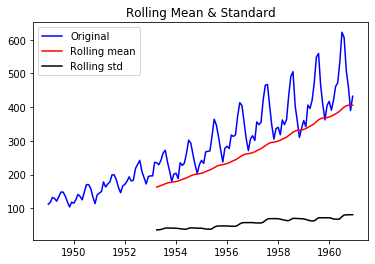

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [6]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling (window=52,center=False).mean()
    rolstd = timeseries.rolling (window=52,center=False).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label ='Original')
    mean = plt.plot(rolmean , color='red', label='Rolling mean')
    std = plt.plot(rolstd , color='black', label = 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard')
    plt.show(block=False)
    #Perform Dickey Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)
test_stationarity(data['#Passengers'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


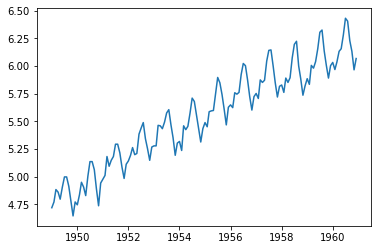

In [14]:
idf_logScale = np.log(idf)
plt.plot(idf_logScale)

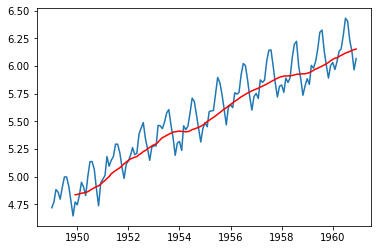

In [15]:
movingAverage = idf_logScale.rolling(window=12).mean()
movingSTD = idf_logScale.rolling(window=12).std()
plt.plot(idf_logScale)
plt.plot(movingAverage, color='r')

In [18]:
#get the difference between moving average and actual no. of passengers
datadiff = idf_logScale - movingAverage
datadiff.dropna(inplace=True)
datadiff.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


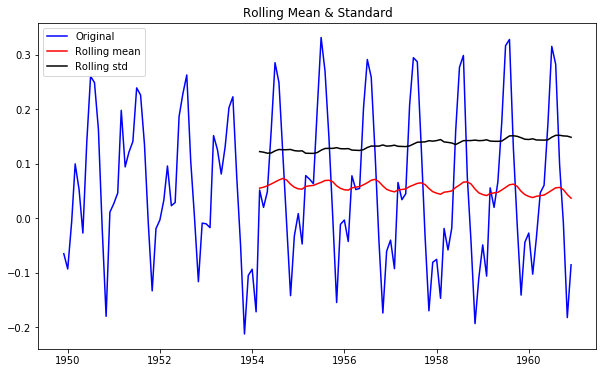

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [23]:
test_stationarity(datadiff['#Passengers'])

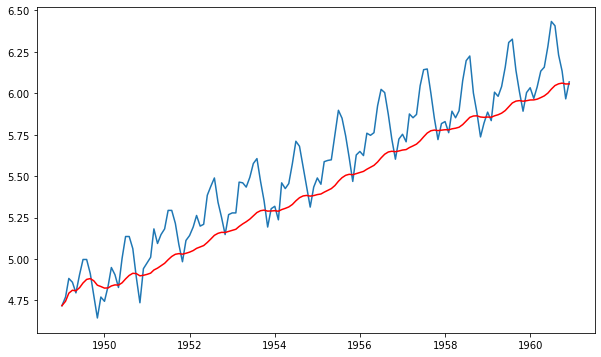

In [24]:
expdecay= idf_logScale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(idf_logScale)
plt.plot(expdecay, color='r')

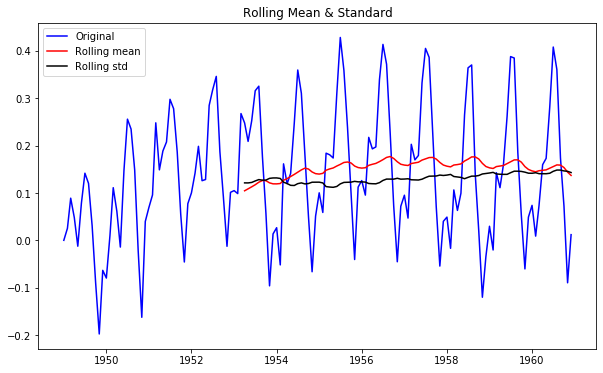

Results of Dickey Fuller Test:
Test Statistic                  -3.601262
p value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [25]:
idflogMinusExpdecay= idf_logScale - expdecay
test_stationarity(idflogMinusExpdecay['#Passengers'])

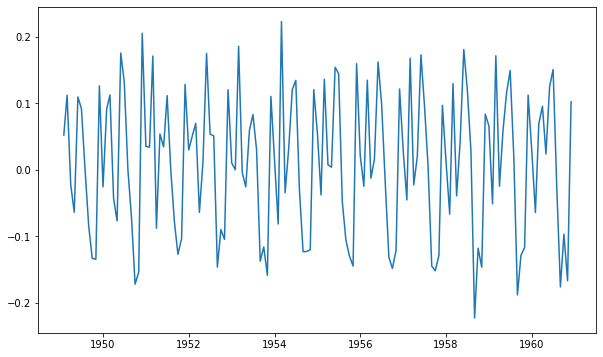

In [26]:
datalogdiffshifting= idf_logScale - idf_logScale.shift()
plt.plot(datalogdiffshifting)

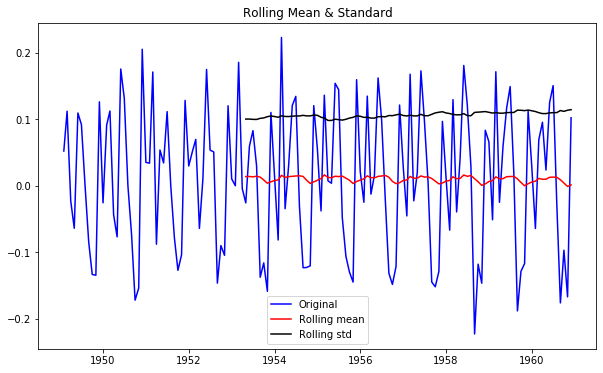

Results of Dickey Fuller Test:
Test Statistic                  -2.717131
p value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [27]:
datalogdiffshifting.dropna(inplace=True)
test_stationarity(datalogdiffshifting['#Passengers'])

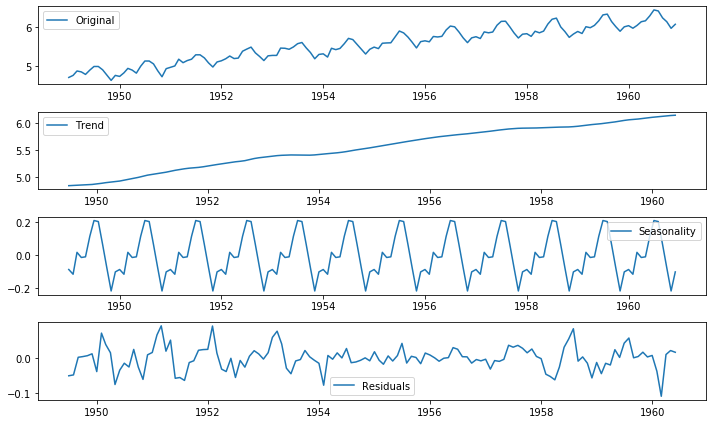

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(idf_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(idf_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

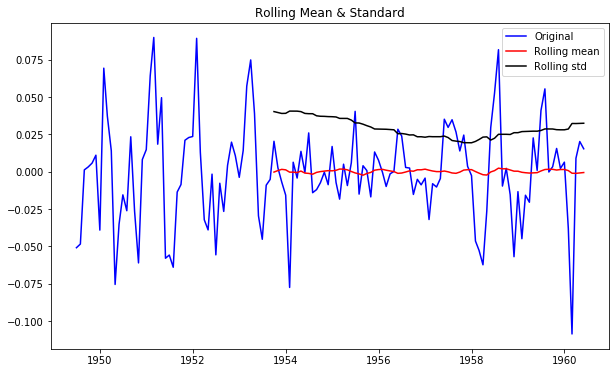

Results of Dickey Fuller Test:
Test Statistic                -6.332387e+00
p value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [30]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData['#Passengers'])

C:\Users\NumoStanley\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


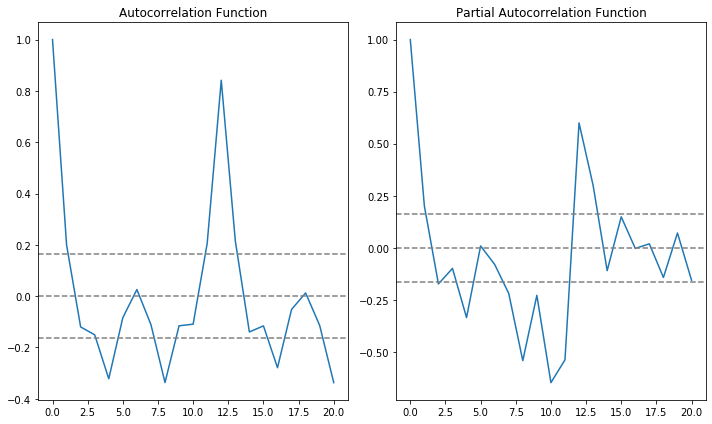

In [31]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datalogdiffshifting, nlags=20)
lag_pacf = pacf(datalogdiffshifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datalogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datalogdiffshifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datalogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datalogdiffshifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\NumoStanley\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\NumoStanley\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


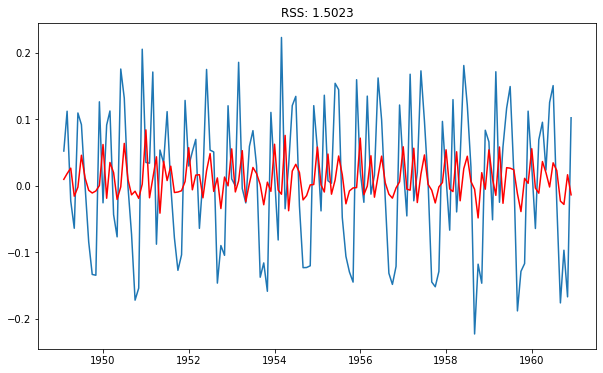

In [32]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(idf_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datalogdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datalogdiffshifting["#Passengers"])**2))
print('Plotting AR model')

C:\Users\NumoStanley\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\NumoStanley\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


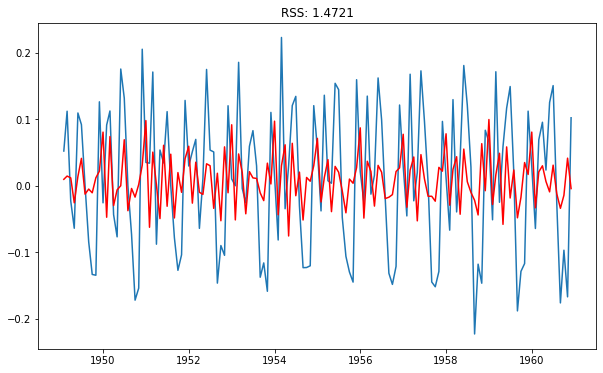

In [38]:
#MA MODEL
model = ARIMA(idf_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datalogdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datalogdiffshifting["#Passengers"])**2))
print('Plotting AR model')

C:\Users\NumoStanley\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\NumoStanley\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARMA model


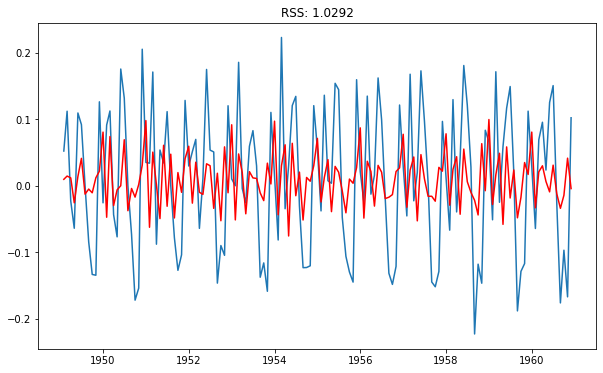

In [39]:
#ARIMA
model = ARIMA(idf_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datalogdiffshifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datalogdiffshifting["#Passengers"])**2))
print('Plotting ARMA model')

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [41]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [42]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(idf_logScale['#Passengers'].ix[0], index=idf_logScale['#Passengers'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\NumoStanley\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1044')

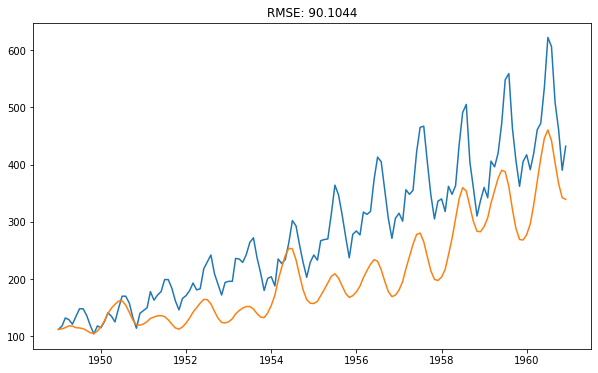

In [43]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(idf)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-idf["#Passengers"])**2)/len(idf["#Passengers"])))

In [44]:
predictions_ARIMA.head()

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073417
1949-04-01    118.301994
1949-05-01    117.768372
dtype: float64

In [45]:
idf.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
